# Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples
from collections import Counter
# from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df_aids = pd.read_csv("AIDS_train.csv")
df_aids

id  time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  ...  \
0        9   188    0   35  78.0192     0     1      0     100       0  ...   
1      322   799    2   35  87.9984     0     1      0     100       0  ...   
2      704   646    1   35  77.5000     0     1      0      90       0  ...   
3       77   771    2   25  71.3000     0     1      0     100       0  ...   
4     1526  1006    1   30  69.4008     0     1      0     100       0  ...   
...    ...   ...  ...  ...      ...   ...   ...    ...     ...     ...  ...   
1813  1033   638    3   38  76.2048     0     1      0     100       0  ...   
1814  1731   813    1   24  68.4936     0     1      0     100       0  ...   
1815   763   827    0   65  60.5000     0     1      0      90       0  ...   
1816   835   983    2   41  75.5000     0     1      0      90       0  ...   
1817  1653  1068    3   31  95.5000     0     1      0      90       0  ...   

      str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  label  
0        1      3        0      0       1   221    132   221    759      1  
1        0      1        0      1       1   262    305  1696   1301      0  
2        1      3        1      1       0   280    265  1703   1020      1  
3        0      1        0      1       1   310    400   610    630      0  
4        0      1        0      1       0   659    511  1392    876      0  
...    ...    ...      ...    ...     ...   ...    ...   ...    ...    ...  
1813     0      1        0      1       1   199    295   707    900      0  
1814     0      1        1      1       1   406    384   672    612      1  
1815     0      1        0      0       1   414    459  2016   1507      1  
1816     1      2        0      1       0   362    293  1156    738      0  
1817     1      2        0      1       0   302    554   478    595      0  

[1818 rows x 25 columns]

In [3]:
df_aids.describe()

id         time          trt          age         wtkg  \
count  1818.000000  1818.000000  1818.000000  1818.000000  1818.000000   
mean   1071.201320   879.564356     1.513751    35.280528    75.205883   
std     617.612441   292.749176     1.130007     8.782799    13.523368   
min       0.000000    14.000000     0.000000    12.000000    31.000000   
25%     543.250000   726.000000     0.000000    29.000000    66.679200   
50%    1070.500000   999.000000     2.000000    34.000000    74.390400   
75%    1601.750000  1091.000000     3.000000    40.000000    82.555200   
max    2137.000000  1231.000000     3.000000    70.000000   159.939360   

              hemo         homo        drugs       karnof       oprior  ...  \
count  1818.000000  1818.000000  1818.000000  1818.000000  1818.000000  ...   
mean      0.084708     0.659516     0.135864    95.434543     0.020902  ...   
std       0.278524     0.474002     0.342738     5.985982     0.143096  ...   
min       0.000000     0.000000     0.000000    70.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000    90.000000     0.000000  ...   
50%       0.000000     1.000000     0.000000   100.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000   100.000000     0.000000  ...   
max       1.000000     1.000000     1.000000   100.000000     1.000000  ...   

              str2        strat      symptom        treat       offtrt  \
count  1818.000000  1818.000000  1818.000000  1818.000000  1818.000000   
mean      0.584708     1.985149     0.174917     0.747525     0.359736   
std       0.492908     0.903305     0.380001     0.434552     0.480055   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       1.000000     2.000000     0.000000     1.000000     0.000000   
75%       1.000000     3.000000     0.000000     1.000000     1.000000   
max       1.000000     3.000000     1.000000     1.000000     1.000000   

              cd40        cd420        cd80        cd820        label  
count  1818.000000  1818.000000  1818.00000  1818.000000  1818.000000  
mean    349.636964   370.500000   991.29978   939.009901     0.239824  
std     118.451243   144.454796   486.14056   452.550833     0.427093  
min       0.000000    50.000000    40.00000   124.000000     0.000000  
25%     261.250000   267.000000   655.00000   628.250000     0.000000  
50%     340.000000   352.000000   894.00000   870.500000     0.000000  
75%     423.000000   459.000000  1210.00000  1149.750000     0.000000  
max    1199.000000  1119.000000  5011.00000  6035.000000     1.000000  

[8 rows x 25 columns]

In [4]:
df_aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1818 non-null   int64  
 1   time     1818 non-null   int64  
 2   trt      1818 non-null   int64  
 3   age      1818 non-null   int64  
 4   wtkg     1818 non-null   float64
 5   hemo     1818 non-null   int64  
 6   homo     1818 non-null   int64  
 7   drugs    1818 non-null   int64  
 8   karnof   1818 non-null   int64  
 9   oprior   1818 non-null   int64  
 10  z30      1818 non-null   int64  
 11  zprior   1818 non-null   int64  
 12  preanti  1818 non-null   int64  
 13  race     1818 non-null   int64  
 14  gender   1818 non-null   int64  
 15  str2     1818 non-null   int64  
 16  strat    1818 non-null   int64  
 17  symptom  1818 non-null   int64  
 18  treat    1818 non-null   int64  
 19  offtrt   1818 non-null   int64  
 20  cd40     1818 non-null   int64  
 21  cd420    1818 

In [5]:
df_aids = df_aids.drop('id', axis=1)

# Data Distribution

## Categorical Variables

In [30]:
# Unique values for categorical variables
categorical_columns = ['trt', 'hemo', 'homo', 'oprior', 'z30', 'zprior', 'drugs', 'karnof', 'race', 'gender', 'str2', 'symptom', 'strat', 'treat', 'offtrt', 'label']
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df_aids[col].value_counts())


trt value counts:
trt
3    410
2    395
0    388
1    367
Name: count, dtype: int64

hemo value counts:
hemo
0    1428
1     132
Name: count, dtype: int64

homo value counts:
homo
1    1035
0     525
Name: count, dtype: int64

oprior value counts:
oprior
0    1526
1      34
Name: count, dtype: int64

z30 value counts:
z30
1    854
0    706
Name: count, dtype: int64

zprior value counts:
zprior
1    1560
Name: count, dtype: int64

drugs value counts:
drugs
0    1354
1     206
Name: count, dtype: int64

karnof value counts:
karnof
100    949
90     549
80      56
70       6
Name: count, dtype: int64

race value counts:
race
0    1099
1     461
Name: count, dtype: int64

gender value counts:
gender
1    1291
0     269
Name: count, dtype: int64

str2 value counts:
str2
1    914
0    646
Name: count, dtype: int64

symptom value counts:
symptom
0    1288
1     272
Name: count, dtype: int64

strat value counts:
strat
1    646
3    629
2    285
Name: count, dtype: int64

treat value counts:
t

In [31]:
# Countplots
plt.figure(figsize=(18, 12))

for i, var in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=df_aids[var], data=df_aids)
    plt.title(f'Count of {var}')

plt.tight_layout()
plt.show()

**Analysis**
- `Treatment Group (trt)`: Distribution across treatment groups is relatively balanced.
- `Hemo` : Most participants do not suffer from haemophilia.
- `Homo` : More participants engaged in homosexual activity.
- `Drugs`: Most participants do not consume IV drug.
- `Karnofsky Score (karnof)`: Most participants have a high Karnofsky score, indicating good health performance.
- `Symptom`: The majority of participants do not show symptoms.
- `Oprior`: Most participants have not had non-ZDV antiretroviral therapy.
- `z30`: The distribution shows there are more participants had ZDV in the 30 days before the study.
- `zprior` : All participants had ZDV before the study.
- `Race`: Most participants belong to white people category.
- `Gender`: Gender distribution shows a higher count in male.
- `Treatment History (str2, strat)`: Showing different distributions across the dataset.
- `Treatment Indicator (treat)`: Majority of participants received other treatment.
- `Off Treatment (offtrt)`: Participants are currently undergoing treatment, but some are off treatment.

## Numeric (Continuous) Variables

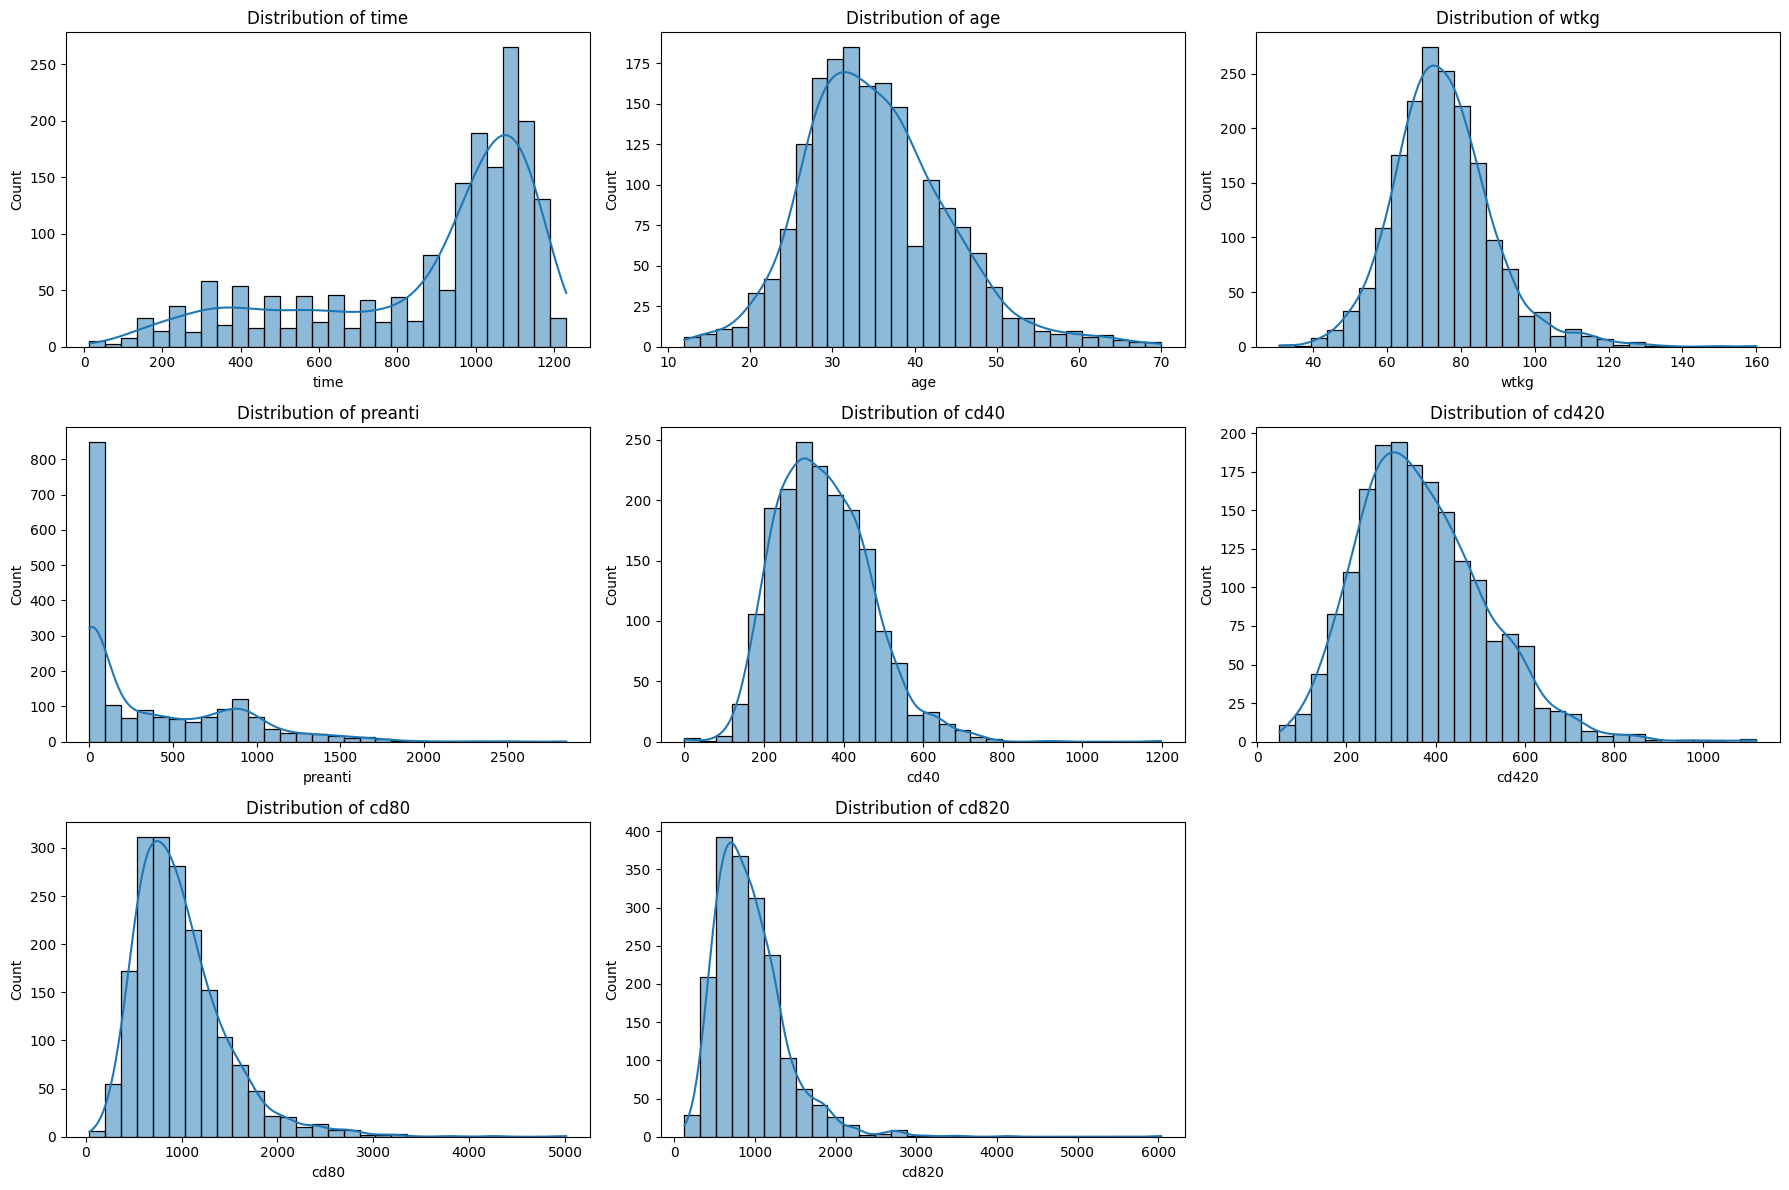

In [8]:
# Unique Values for numeric variables
numeric_columns = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

plt.figure(figsize=(18, 12))

for i, var in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_aids[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

**Insight**

- `Age`: The age distribution appears to be slightly right-skewed means the most participants are in the lower age range.
- `Weight (wtkg)`: The weight distribution is relatively normal but with a possible slight skew.
- `Prior Antiviral Treatment (preanti)` : MOst participants do not received prior anti-retroviral treatment.
- `CD4 Counts (cd40, cd420)`: These have a relatively normal distribution, though thee are a few extreme values (potential outliers).
- `CD8 Counts (cd80, cd820)`: The distribution suggests that most participants fall within a typical range showing a right skewed.

In [9]:
# Pair plot for numeric variables
sns.pairplot(df_aids[numeric_columns + ['label']], hue='label', diag_kind='kde')
plt.show()

In [10]:
# Boxplot for numeric variables
plt.figure(figsize=(18, 12))

for i, var in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_aids['label'], y=df_aids[var])
    plt.title(f'{var} vs Label')

plt.tight_layout()
plt.show()

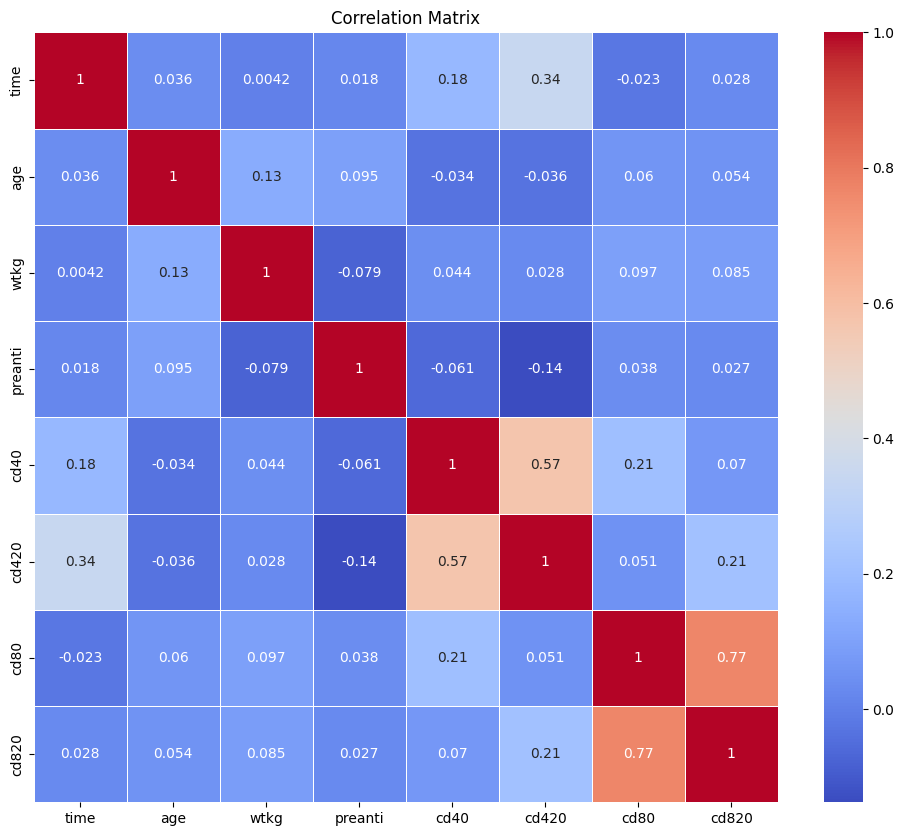

In [11]:
# Correlation matrix with heatmap
corr_matrix = df_aids[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [12]:
df_aids.head(5)

time  trt  age     wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  str2  \
0   188    0   35  78.0192     0     1      0     100       0    1  ...     1   
1   799    2   35  87.9984     0     1      0     100       0    0  ...     0   
2   646    1   35  77.5000     0     1      0      90       0    1  ...     1   
3   771    2   25  71.3000     0     1      0     100       0    0  ...     0   
4  1006    1   30  69.4008     0     1      0     100       0    0  ...     0   

   strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  label  
0      3        0      0       1   221    132   221    759      1  
1      1        0      1       1   262    305  1696   1301      0  
2      3        1      1       0   280    265  1703   1020      1  
3      1        0      1       1   310    400   610    630      0  
4      1        0      1       0   659    511  1392    876      0  

[5 rows x 24 columns]

## Null Values

In [13]:
# Checking null values
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("No missing values found in the dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [14]:
cek_null(df_aids)

No missing values found in the dataset


## Data Duplicate

In [15]:
# Check for duplicate data
print("Number of data duplications : " + str(df_aids.duplicated().sum()))

Number of data duplications : 0


## Outliers

In [16]:
def detect_outliers(df, numeric_columns):
    outlier_info = []
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        percentage = (num_outliers / df.shape[0]) * 100
        outlier_info.append({
            'Feature': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': num_outliers,
            'Percentage of Outliers': percentage
        })
    return pd.DataFrame(outlier_info)

In [17]:
outlier = detect_outliers(df_aids, numeric_columns)
print(outlier)

   Feature  Lower Bound  Upper Bound  Number of Outliers  \
0     time     178.5000    1638.5000                  40   
1      age      12.5000      56.5000                  44   
2     wtkg      42.8652     106.3692                  54   
3  preanti   -1125.7500    1876.2500                   9   
4     cd40      18.6250     665.6250                  24   
5    cd420     -21.0000     747.0000                  24   
6     cd80    -177.5000    2042.5000                  66   
7    cd820    -154.0000    1932.0000                  50   

   Percentage of Outliers  
0                2.200220  
1                2.420242  
2                2.970297  
3                0.495050  
4                1.320132  
5                1.320132  
6                3.630363  
7                2.750275  


In [18]:
# Remove outliers
Q1 = df_aids[numeric_columns].quantile(0.25)
Q3 = df_aids[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_aids = df_aids[~((df_aids[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_aids[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_aids.dropna(inplace=True)

## Encoding and Scaling

In [32]:
df_processed = df_aids.copy()

In [33]:
binary_columns = ['hemo', 'homo', 'oprior', 'z30', 'zprior', 'drugs', 'race', 'gender', 'str2', 'symptom', 'treat', 'offtrt', 'label']
categorical_columns = ['trt', 'strat']
numeric_columns = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Categorizing Karnofsky Score
df_processed['karnof_category'] = pd.cut(df_processed['karnof'], bins=[0, 50, 70, 100], labels=['Low', 'Medium', 'High'])

In [49]:
df_processed = df_processed.drop(columns=['karnof'])

In [53]:
# Define the ordinal categories for karnof_category (Low < Medium < High)
ordinal_categories = [['Low', 'Medium', 'High']]

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),  # Standardize continuous features
        ('cat', OneHotEncoder(), categorical_columns),  # One-Hot Encode non-binary categorical features
        ('ord', OrdinalEncoder(categories=ordinal_categories), ['karnof_category'])  # Ordinal encode karnof_category
    ], remainder='passthrough')  # Keep binary columns as-is, no need to transform them

In [58]:
# Fit the preprocessing pipeline to the data, without applying K-Means yet
preprocessed_data = preprocessor.fit_transform(df_processed)

# Get the column names after transformation
# OneHotEncoder will generate multiple columns, so we need to extract those names
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
karnof_category_name = preprocessor.named_transformers_['ord'].get_feature_names_out(['karnof_category'])
all_feature_names = numeric_columns + list(categorical_feature_names) + ['karnof_category'] + binary_columns



In [62]:
# Convert the preprocessed data into a DataFrame for inspection
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names[:preprocessed_data.shape[1]])

# Display the preprocessed data
preprocessed_df.head()

time       age      wtkg   preanti      cd40     cd420      cd80  \
0 -2.615653  0.047509  0.331892  1.317955 -1.133598 -1.803997 -1.919124   
1 -0.366377  0.047509  1.206784 -0.840673 -0.757724 -0.469245  2.139082   
2 -0.929616  0.047509  0.286373  0.776059 -0.592706 -0.777858  2.158341   
3 -0.469453 -1.232523 -0.257190 -0.840673 -0.317677  0.263711 -0.848858   
4  0.395653 -0.592507 -0.423696 -0.840673  2.881834  1.120112  1.302679   

      cd820  trt_0  trt_1  ...  z30  zprior  drugs  race  gender  str2  \
0 -0.342591    1.0    0.0  ...  0.0     1.0    1.0   0.0     1.0   1.0   
1  1.255611    0.0    0.0  ...  0.0     0.0    1.0   0.0     1.0   0.0   
2  0.427023    0.0    1.0  ...  0.0     1.0    1.0   0.0     1.0   1.0   
3 -0.722975    0.0    0.0  ...  0.0     0.0    1.0   0.0     1.0   0.0   
4  0.002408    0.0    1.0  ...  0.0     0.0    1.0   0.0     1.0   0.0   

   symptom  treat  offtrt  label  
0      0.0    0.0     1.0    1.0  
1      0.0    1.0     1.0    0.0  
2      1.0    1.0     0.0    1.0  
3      0.0    1.0     1.0    0.0  
4      0.0    1.0     0.0    0.0  

[5 rows x 29 columns]

# KMeans Clustering

In [63]:
# Select the subset of columns ('time', 'age', 'wtkg') from the preprocessed data
selected_columns = ['time', 'age', 'wtkg'] 
subset_data = preprocessed_df[selected_columns]  

subset_data.head()

time       age      wtkg
0 -2.615653  0.047509  0.331892
1 -0.366377  0.047509  1.206784
2 -0.929616  0.047509  0.286373
3 -0.469453 -1.232523 -0.257190
4  0.395653 -0.592507 -0.423696

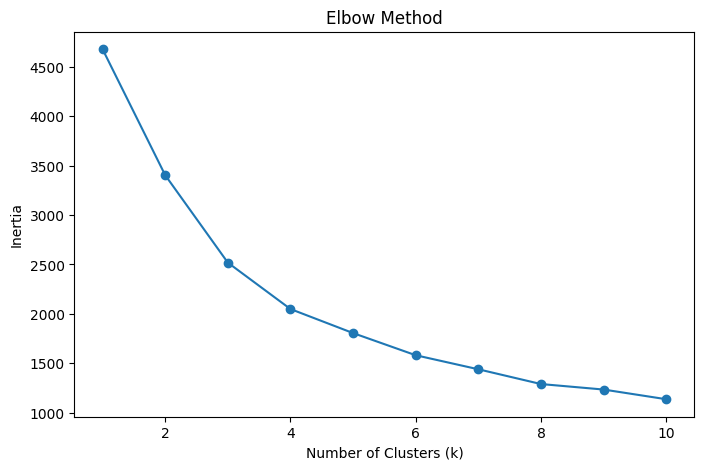

Silhouette Score for k=2: 0.3408
Silhouette Score for k=3: 0.2886
Silhouette Score for k=4: 0.2823
Silhouette Score for k=5: 0.2810
Silhouette Score for k=6: 0.2693
Silhouette Score for k=7: 0.2536
Silhouette Score for k=8: 0.2613
Silhouette Score for k=9: 0.2532


In [64]:
# Function to calculate and plot the Elbow Method
def plot_elbow_method(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

# Run Elbow Method to determine optimal k
plot_elbow_method(subset_data, max_clusters=10)

# Calculate Silhouette Score for different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(subset_data)  
    score = silhouette_score(subset_data, cluster_labels) 
    print(f"Silhouette Score for k={k}: {score:.4f}")

**Elbow Method Analysis:**
- The Elbow Method graph shows a significant drop in inertia between k=1 and k=3, after which the slope starts to flatten. This suggests that the optimal number of clusters might be around k=3 or k=4, as adding more clusters beyond this point doesn't reduce inertia as significantly.

**Silhouette Score Analysis:**
- The Silhouette Score shows how well-separated and coherent the clusters are.
- The highest Silhouette Score is at k=2: `0.3408.`
- However, k=3 also has a reasonable Silhouette Score of `0.2886.`
- The score continues to decrease after k=3, with k=4 and beyond showing lower scores (indicating less separation between clusters).

**Conclusion:**
- The Elbow Method suggests `k=3` as a reasonable choice since inertia flattens significantly after this point.
- The Silhouette Score for k=3 is relatively high (0.2886), and though k=2 has the highest score, it's likely that k=2 doesn't capture enough complexity in the data (we may be oversimplifying by clustering the entire dataset into just two groups).



In [65]:
k = 3  # Optimal number of clusters based on the Elbow Method and Silhouette Score

# Apply K-Means clustering to the selected subset of data
kmeans = KMeans(n_clusters=k, random_state=42)
df_processed['cluster'] = kmeans.fit_predict(subset_data)

# Inspect the resulting clusters
print(df_processed[['time', 'age', 'wtkg', 'cluster']].head())

# To see the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

   time  age     wtkg  cluster
0   188   35  78.0192        2
1   799   35  87.9984        1
2   646   35  77.5000        2
3   771   25  71.3000        0
4  1006   30  69.4008        0
Cluster Centers:
[[ 0.47885133 -0.54373446 -0.56948688]
 [ 0.45601716  0.70952536  0.64613425]
 [-1.67321786 -0.17321216 -0.01757556]]


### 3D Visualization

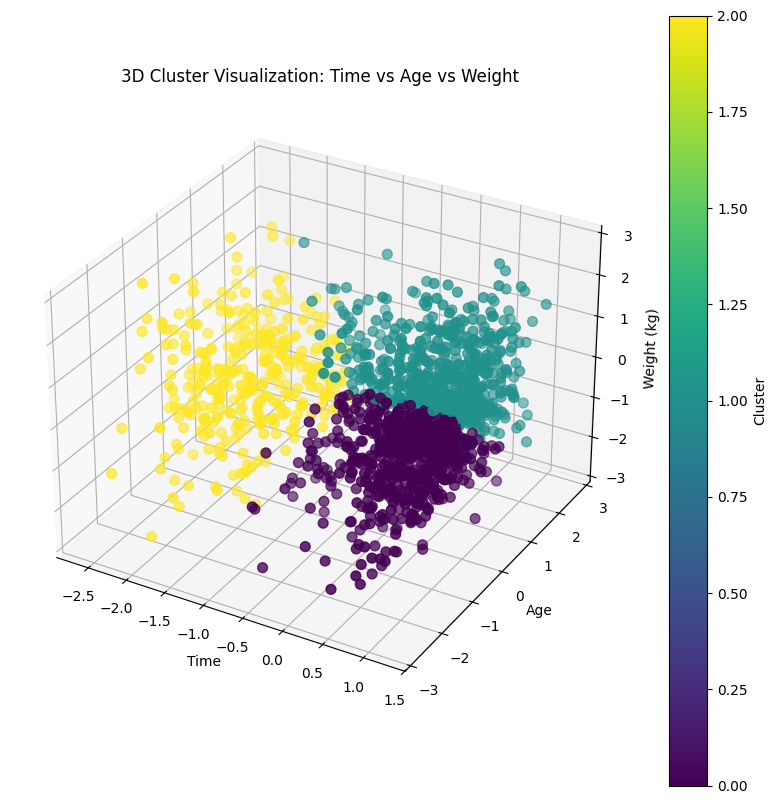

In [67]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

# Use the selected features for the axes
x = subset_data['time']
y = subset_data['age']
z = subset_data['wtkg']

# Scatter plot with cluster labels as hue
scat = ax.scatter(x, y, z, c=df_processed['cluster'], cmap='viridis', s=50)

# Adding axis labels
ax.set_xlabel('Time')
ax.set_ylabel('Age')
ax.set_zlabel('Weight (kg)')

# Add a color bar
fig.colorbar(scat, ax=ax, label='Cluster')

# Set the title
plt.title('3D Cluster Visualization: Time vs Age vs Weight')

plt.show()

### 2D Visualization

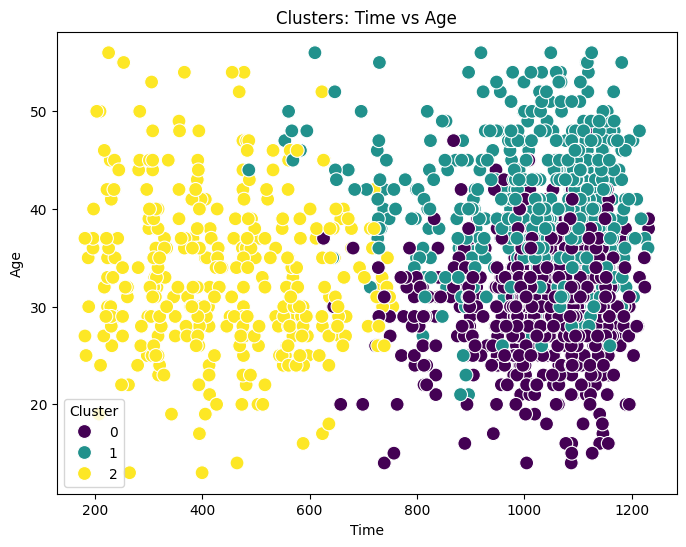

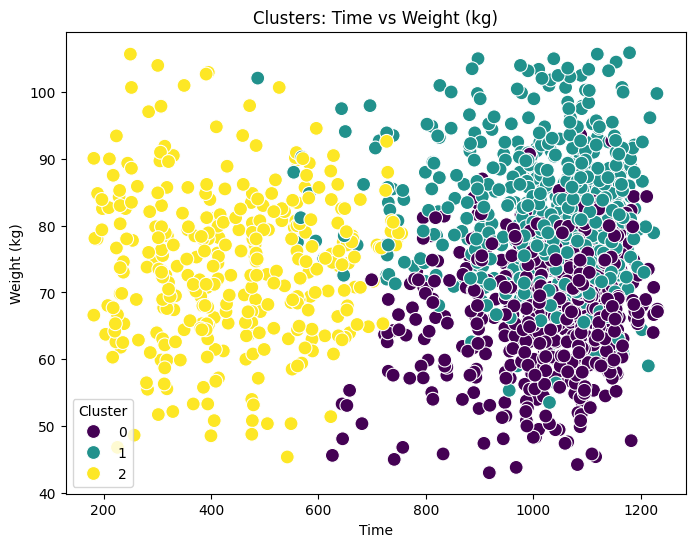

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: time vs age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_processed['time'], y=df_processed['age'], hue=df_processed['cluster'], palette='viridis', s=100)
plt.title('Clusters: Time vs Age')
plt.xlabel('Time')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

# Plot 2: time vs wtkg
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_processed['time'], y=df_processed['wtkg'], hue=df_processed['cluster'], palette='viridis', s=100)
plt.title('Clusters: Time vs Weight (kg)')
plt.xlabel('Time')
plt.ylabel('Weight (kg)')
plt.legend(title='Cluster')
plt.show()

# Plot 3: age vs wtkg
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_processed['age'], y=df_processed['wtkg'], hue=df_processed['cluster'], palette='viridis', s=100)
plt.title('Clusters: Age vs Weight (kg)')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')
plt.legend(title='Cluster')
plt.show()

In [73]:
# Describe the statistics for each cluster
cluster_stats = df_processed.groupby('cluster').agg({
    'time': ['mean', 'median', 'std'],
    'age': ['mean', 'median', 'std'],
    'wtkg': ['mean', 'median', 'std']
}).reset_index()

# Convert the column names for better readability
cluster_stats.columns = ['Cluster',
                          'MeanTime', 'MedianTime', 'StdTime',
                          'MeanAge', 'MedianAge', 'StdAge',
                          'MeanWeight', 'MedianWeight', 'StdWeight']

# Display the statistics
cluster_stats

Cluster     MeanTime  MedianTime     StdTime    MeanAge  MedianAge  \
0        0  1028.765625      1052.0  111.392318  30.379687       30.0   
1        1  1022.246978      1055.0  129.099085  40.122625       40.0   
2        2   444.005865       429.0  147.377067  33.275660       32.0   

     StdAge  MeanWeight  MedianWeight  StdWeight  
0  5.663592   67.672552       67.8566   8.694712  
1  6.503432   81.603878       81.1944   9.641926  
2  7.786128   74.033097       74.5000  11.101224

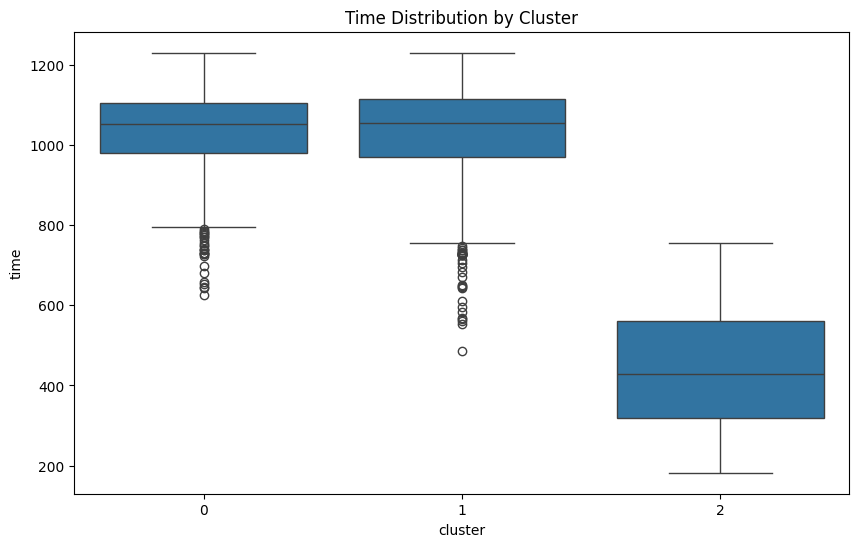

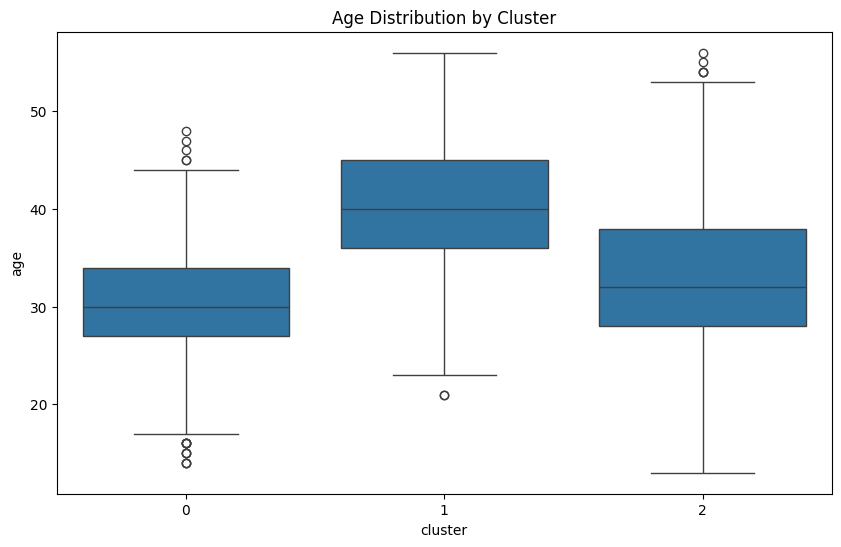

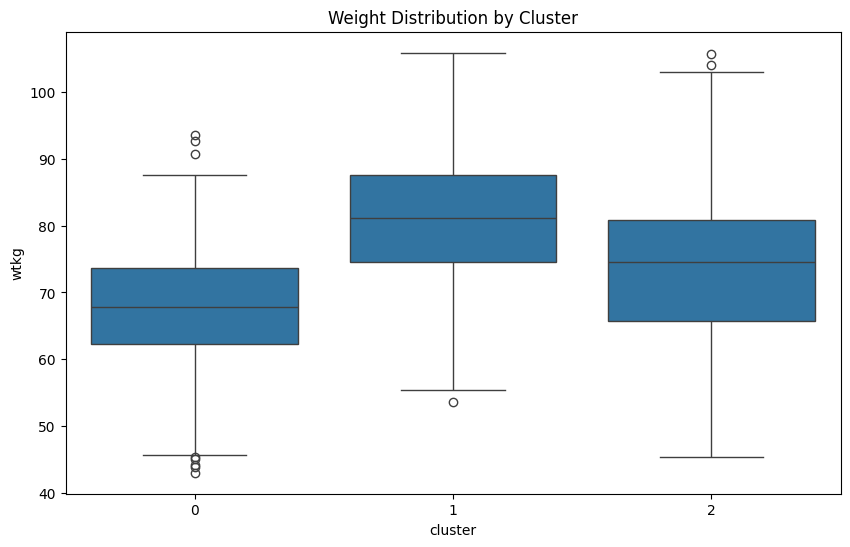

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='time', data=df_processed)
plt.title('Time Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='age', data=df_processed)
plt.title('Age Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='wtkg', data=df_processed)
plt.title('Weight Distribution by Cluster')
plt.show()

### Insight

**Cluster 0:**
- Mean Time: 1028.77 days (longer time period).
- Mean Age: 30.38 years.
- Mean Weight: 67.67 kg (lower average weight).
- This cluster seems to group **younger and lighter individuals** who have a relatively long time period.

**Cluster 1:**
- Mean Time: 1022.25 days (similar to Cluster 0).
- Mean Age: 40.12 years (older than Cluster 0).
- Mean Weight: 81.60 kg (heavier individuals compared to Cluster 0).
- This cluster represents **older and heavier individuals with a long time period**, similar to Cluster 0 in terms of time.

**Cluster 2:**
- Mean Time: 444.01 days (much shorter time period).
- Mean Age: 33.28 years.
- Mean Weight: 74.03 kg.
- This cluster stands out in terms of time: it includes individuals with a much **shorter period of time** (mean of 444 days), and the individuals are **somewhat heavier and older** than those in Cluster 0, but younger than those in Cluster 1.

# KMeans Clustering using PCA

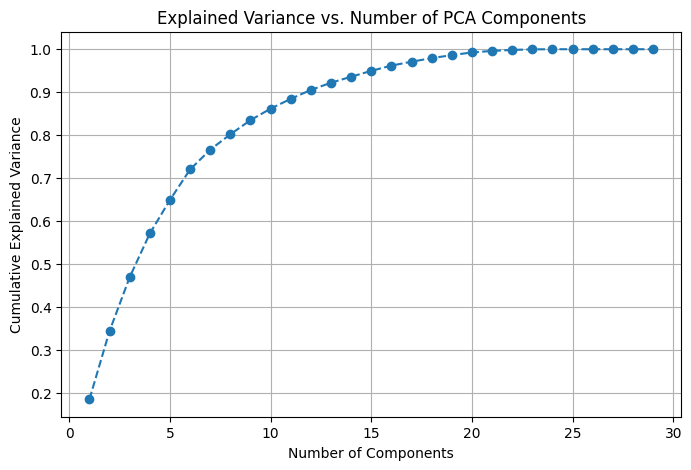

Number of components explaining 80% variance: 8
Number of components explaining 90% variance: 12


In [80]:
from sklearn.decomposition import PCA

# Assuming preprocessed_df contains the standardized data
# Apply PCA
pca = PCA()
pca.fit(preprocessed_df)

# Calculate the cumulative explained variance
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance to see how many components explain the variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.show()

# Print the number of components to retain for 80-90% variance
print(f"Number of components explaining 80% variance: {next(i for i, val in enumerate(explained_variance) if val >= 0.80) + 1}")
print(f"Number of components explaining 90% variance: {next(i for i, val in enumerate(explained_variance) if val >= 0.90) + 1}")


In [81]:
n_components = 12

# Fit PCA again with the determined number of components
pca_reduced = PCA(n_components=n_components)
pca_reduced_data = pca_reduced.fit_transform(preprocessed_df)

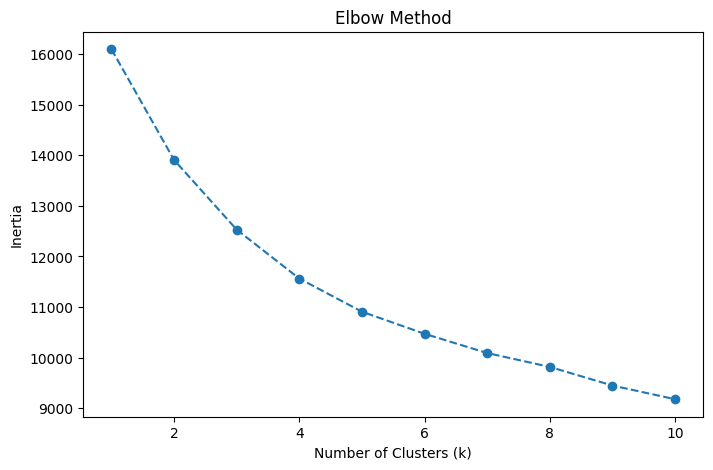

Silhouette Score for k=2: 0.1289
Silhouette Score for k=3: 0.1280
Silhouette Score for k=4: 0.1258
Silhouette Score for k=5: 0.1123
Silhouette Score for k=6: 0.1109
Silhouette Score for k=7: 0.1135
Silhouette Score for k=8: 0.0939
Silhouette Score for k=9: 0.0982
Silhouette Score for k=10: 0.1042


In [82]:
# Function to calculate and plot the Elbow Method
def plot_elbow_method(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

# Run Elbow Method to determine optimal k
plot_elbow_method(pca_reduced_data, max_clusters=10)

# Calculate Silhouette Score for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_reduced_data)  
    score = silhouette_score(pca_reduced_data, cluster_labels) 
    print(f"Silhouette Score for k={k}: {score:.4f}")

**Elbow Method Analysis:**
- The Elbow Method graph shows a gradual decrease in inertia without a clear, sharp "elbow" point.

**Silhouette Score Analysis:**
- The Silhouette Score shows how well-separated and coherent the clusters are. Generally, higher Silhouette Scores indicate better-defined clusters.
- The Silhouette Scores for different values of k show relatively low values (around 0.1), suggesting that the clusters may not be well-separated.

**Conclusion:**
- k=2 has the highest Silhouette Score (0.1289), but it's only slightly higher than k=3 (0.1280) and k=4 (0.1258).
- `k=3` is a reasonable choice based on the Silhouette Scores and the inertia plot. It strikes a balance between simplicity and moderate clustering quality, which may be easier to interpret and analyze.




In [83]:
k = 3  # Optimal number of clusters based on the Elbow Method and Silhouette Score

# Apply K-Means clustering to the reduced pca data
kmeans = KMeans(n_clusters=k, random_state=42)
df_processed['pca_cluster'] = kmeans.fit_predict(pca_reduced_data)

# Optional: To see the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-1.39747107  0.38949154  0.40267183 -0.17443044 -0.03379552 -0.02937249
   0.03135237 -0.0142996   0.13585125  0.06772574 -0.00445883  0.01617095]
 [ 1.02937273  1.3721961  -0.1006586   0.0068436  -0.0330872  -0.03361281
  -0.03659179 -0.05093229  0.11794603  0.02399997 -0.00993188 -0.02555023]
 [ 0.45637993 -1.21058179 -0.25945634  0.13639611  0.04889812  0.04566943
  -0.00142494  0.04480656 -0.18672791 -0.07036524  0.01008631  0.00362503]]


## PCA Loadings

In [89]:
pca_loadings = pd.DataFrame(pca.components_.T, index=preprocessed_df.columns, 
                            columns=[f'PC{i+1}' for i in range(pca.n_components_)])

pca_loadings

PC1           PC2           PC3           PC4  \
time             2.633234e-01  2.719102e-02  5.250902e-01  3.311373e-02   
age              4.340453e-02  2.069728e-01  8.038986e-02  6.445600e-01   
wtkg             1.390628e-01  7.162105e-02 -7.286171e-02  6.927740e-01   
preanti         -1.851255e-01  5.848644e-01  3.460695e-01 -9.871884e-02   
cd40             4.835892e-01 -5.988562e-02  2.606031e-01 -1.198950e-01   
cd420            5.282075e-01 -1.490310e-01  2.804816e-01 -6.139995e-02   
cd80             3.819681e-01  3.989804e-01 -4.004584e-01 -1.240899e-01   
cd820            3.857618e-01  3.784998e-01 -4.022702e-01 -1.251948e-01   
trt_0           -2.237907e-02 -9.188663e-03 -3.963285e-02  1.562232e-02   
trt_1            1.928227e-02 -3.375675e-03  1.960598e-03 -9.235702e-03   
trt_2            6.530812e-03  2.516557e-03  1.930335e-02 -3.951183e-04   
trt_3           -3.434015e-03  1.004778e-02  1.836890e-02 -5.991500e-03   
strat_1          1.125835e-01 -2.587691e-01 -1.357159e-01  6.256455e-02   
strat_2         -2.113569e-02 -1.302172e-02 -1.659187e-02 -1.994405e-02   
strat_3         -9.144784e-02  2.717908e-01  1.523078e-01 -4.262050e-02   
karnof_category  1.415479e-03 -1.549487e-03  3.102783e-03 -8.736665e-04   
hemo            -2.912348e-02  8.943676e-03  1.515348e-02 -4.898231e-02   
homo             5.548474e-02  4.713025e-02 -2.542597e-02  1.145186e-01   
oprior           1.353427e-03 -4.991914e-03 -7.465124e-03  1.323047e-02   
z30             -1.049197e-02  9.025622e-03  6.137337e-04  5.752881e-03   
zprior          -1.057695e-01  2.498118e-01  1.337153e-01 -6.151924e-02   
drugs            6.387241e-18 -1.121811e-17  3.346010e-19  3.125323e-17   
race            -9.396790e-03 -4.682639e-02 -2.774264e-02 -7.362274e-02   
gender           2.707969e-02  4.076526e-02 -2.228471e-02  8.977438e-02   
str2            -1.125835e-01  2.587691e-01  1.357159e-01 -6.256455e-02   
symptom         -2.232071e-02  2.542425e-02 -3.807720e-02  1.724708e-02   
treat            2.237907e-02  9.188663e-03  3.963285e-02 -1.562232e-02   
offtrt          -7.964775e-02 -2.662500e-02 -1.414218e-01 -2.027888e-02   
label           -9.547050e-02  5.202821e-02 -1.351621e-01  1.413366e-02   

                          PC5           PC6           PC7           PC8  \
time             5.752664e-01 -3.870179e-01 -2.378631e-01  6.025984e-02   
age              2.920067e-01  6.560748e-01 -2.129668e-02  1.002222e-02   
wtkg            -3.927676e-01 -5.374735e-01  1.795782e-02 -7.603771e-02   
preanti         -2.311068e-01  2.240317e-02  1.061526e-01  6.974192e-02   
cd40            -4.704951e-01  2.643857e-01 -4.128058e-01 -1.574344e-01   
cd420           -1.664210e-01  1.254223e-01  5.660574e-01  1.665657e-01   
cd80             7.809318e-02 -1.108383e-02 -3.733415e-01 -2.456929e-01   
cd820            1.999117e-01 -7.725306e-02  3.199791e-01  2.582938e-01   
trt_0           -1.007710e-01  1.274528e-02 -2.600685e-01  5.726601e-01   
trt_1            4.961945e-02 -1.083310e-03  1.572357e-01 -1.030086e-01   
trt_2            3.521047e-02  1.461961e-02 -1.220955e-02 -2.773565e-01   
trt_3            1.594106e-02 -2.628158e-02  1.150424e-01 -1.922950e-01   
strat_1          5.874317e-02  3.316907e-02 -2.225082e-02  4.126467e-02   
strat_2          2.697886e-02 -3.037212e-02 -1.210138e-02 -8.457181e-02   
strat_3         -8.572203e-02 -2.796955e-03  3.435220e-02  4.330714e-02   
karnof_category  1.450397e-05 -1.739503e-03  8.161983e-04 -5.094538e-03   
hemo            -3.417618e-02 -4.921508e-02 -9.437993e-03 -3.212990e-02   
homo             1.189833e-02 -5.213410e-02  5.442605e-02  6.371942e-02   
oprior           1.537609e-02  6.017165e-02  7.517994e-03 -2.538781e-02   
z30              8.423711e-04 -2.009227e-03 -8.366860e-03  4.523004e-03   
zprior          -5.890880e-02 -3.105928e-02  1.348045e-02 -4.156717e-02   
drugs           -9.593250e-18 -1.143887e-17  5.581194e-18 -7.200231e-17   
race             2.703462e-02  4.347650e-02 -7.551

In [90]:
# Focus on the first 3 principal components
top_pcs = pca_loadings[['PC1', 'PC2', 'PC3']]

# Sort the features by their contribution to each principal component
print("Top contributing features for PC1:")
print(top_pcs['PC1'].sort_values(ascending=False))

print("Top contributing features for PC2:")
print(top_pcs['PC2'].sort_values(ascending=False))

print("Top contributing features for PC3:")
print(top_pcs['PC3'].sort_values(ascending=False))

Top contributing features for PC1:
cd420              5.282075e-01
cd40               4.835892e-01
cd820              3.857618e-01
cd80               3.819681e-01
time               2.633234e-01
wtkg               1.390628e-01
strat_1            1.125835e-01
homo               5.548474e-02
age                4.340453e-02
gender             2.707969e-02
treat              2.237907e-02
trt_1              1.928227e-02
trt_2              6.530812e-03
karnof_category    1.415479e-03
oprior             1.353427e-03
drugs              6.387241e-18
trt_3             -3.434015e-03
race              -9.396790e-03
z30               -1.049197e-02
strat_2           -2.113569e-02
symptom           -2.232071e-02
trt_0             -2.237907e-02
hemo              -2.912348e-02
offtrt            -7.964775e-02
strat_3           -9.144784e-02
label             -9.547050e-02
zprior            -1.057695e-01
str2              -1.125835e-01
preanti           -1.851255e-01
Name: PC1, dtype: float64
Top contrib

**PC1:**
- PC1 is heavily influenced by immune function metrics (CD4 and CD8 counts at baseline and 20 weeks). This suggests that immune health and progression (based on CD counts) are driving factors for how the data is separated along this component.
- Time and weight also play significant roles, but to a lesser extent compared to the immune-related features.

**PC2:**
- PC2 is primarily driven by prior antiretroviral therapy (days of pre-study therapy, weeks of prior antiretroviral use), indicating that treatment history has a significant impact along this component.
- CD8 counts also remain important, reflecting the influence of immune function on this component as well.

**PC3:**
- PC3 is influenced strongly by time (likely the time to failure or censoring), along with pre-study antiretroviral therapy and CD4 counts. This suggests that the progression of the disease (captured by time) and immune function, along with treatment history, are critical for the third principal component.

**Overall:**
- PC1 is heavily driven by immune-related metrics (CD4 and CD8 counts), indicating that immune function is a key factor in separating the data in the first dimension.
- PC2 is driven by treatment history (prior antiretroviral therapy) and immune metrics, suggesting that prior exposure to treatment plays a major role in the second dimension.
- PC3 focuses more on time (progression) and treatment history, combined with immune function, suggesting that progression over time and past treatments are crucial for understanding the variance along this component.

## 3D Visualization

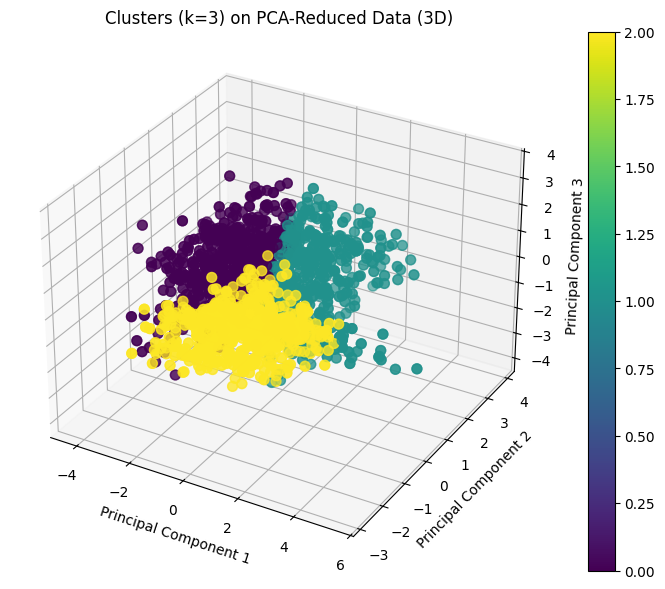

In [ ]:
# Create a 3D scatter plot using the first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three principal components
ax.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], pca_reduced_data[:, 2], 
           c=df_processed['pca_cluster'], cmap='viridis', s=50)

# Set labels for each axis
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Clusters (k=3) on PCA-Reduced Data (3D)')
plt.colorbar(ax.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], pca_reduced_data[:, 2], 
                        c=df_processed['pca_cluster'], cmap='viridis', s=50), ax=ax)
plt.show()


## 2D Visualization

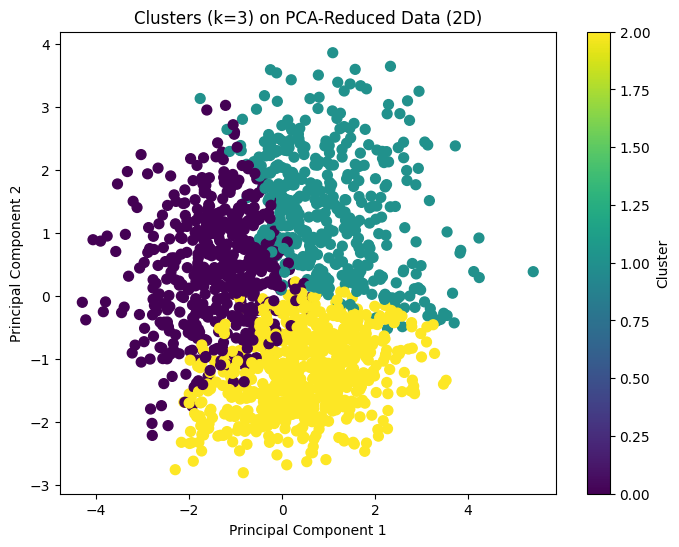

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=df_processed['pca_cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters (k=3) on PCA-Reduced Data (2D)')
plt.colorbar(label='Cluster')
plt.show()

In [94]:
# Group by 'pca_cluster' and calculate the mean values of the top contributing features
top_features = ['cd40', 'cd420', 'cd80', 'cd820', 'time', 'preanti', 'age', 'wtkg']

# Group by 'pca_cluster' and calculate summary statistics (mean, median, std)
# cluster_stats_pca = df_processed.groupby('pca_cluster')[top_features].agg(['mean', 'median', 'std'])
cluster_stats_pca = df_processed.groupby('pca_cluster')[top_features].mean()

# Display the cluster statistics
cluster_stats_pca


cd40       cd420         cd80        cd820        time  \
pca_cluster                                                                 
0            281.972763  283.167315   726.986381   697.509728  851.879377   
1            391.553398  403.985437  1277.713592  1197.254854  968.247573   
2            364.988959  408.026814   840.399054   809.932177  891.029968   

                preanti        age       wtkg  
pca_cluster                                    
0            637.461089  34.011673  71.058013  
1            609.060680  36.968447  77.637038  
2             11.165615  33.608833  74.596351

## Insight

**Cluster 0**: 
- This cluster consists of **younger patients** (34 years) with **poorer immune function** (lower CD counts), **moderate disease progression** (851 days), and extensive pre-study antiretroviral therapy (637 days). 
- These might be patients who were **heavily treated before the study but still have weaker immune responses**.

**Cluster 1**: 
- These are the **oldest patients** (37 years) with the **best immune function** (highest CD counts), the **longest disease progression** (968 days), and significant pre-study therapy (609 days). 
- This cluster represents **healthier, older individuals who have been treated effectively.**

**Cluster 2**: 
- This group includes **young, relatively untreated patients** (33 years, only 11 days of prior therapy) with **moderate immune** function and slightly **faster disease progression** (891 days). 
- These might be **treatment-naive patients who haven't had much antiretroviral therapy before the study.**